**CONTEXTE**

La fraude financière est un problème majeur dans le secteur bancaire et des services financiers. Elle inclut des actes criminels tels que les transactions frauduleuses, les transferts non autorisés, et la manipulation des informations financières dans le but d'escroquer les institutions bancaires ou leurs clients. La détection de fraudes est cruciale pour limiter les pertes économiques et protéger les utilisateurs des services financiers.


**Objectif**

L'objectif principal de ce projet est de développer un modèle automatisé de détection de fraude financière basé sur l'analyse de transactions financières. Ce modèle devra identifier les transactions suspectes ou frauduleuses à partir de données transactionnelles, telles que les montants des transactions, les comptes sources et destinataires, la nature de la transaction et d'autres informations pertinentes.

**Téléchargement du dataset**

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ealaxi/paysim1")

print("Path to dataset files:", path)

100%|██████████| 178M/178M [00:04<00:00, 39.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ealaxi/paysim1/versions/2


In [3]:
import pandas as pd
data = pd.read_csv(path + "/PS_20174392719_1491204439457_log.csv")
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


**Descriptions des colonnes :**

**step** : Représente l'étape temporelle de la transaction (par exemple, heures).

**type** : Le type de transaction (par exemple, PAYEMENT, TRANSFERT, RETRAIT).

**amount** : Le montant de la transaction.

**nameOrig** : Identifiant unique du compte d'origine.

**oldbalanceOrg** : Solde du compte d'origine avant la transaction.

**newbalanceOrig** : Solde du compte d'origine après la transaction.

**nameDest** : Identifiant unique du compte de destination.

**oldbalanceDest** : Solde du compte de destination avant la transaction.

**newbalanceDest** : Solde du compte de destination après la transaction.

**isFraud** : Indique si la transaction est frauduleuse (1) ou non (0).

**isFlaggedFraud** : Indique si la transaction a été signalée comme suspecte (1) ou non (0) par le système.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


**NOTE**: Les transactions qui sont détectées comme fraude sont annulées, donc pour la détection de fraude les colonnes (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest ) ne doivent pas être utilisées.

**Importation des bibliothèques**

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score

In [8]:
data_encoded = data.copy()
categoricals_columns = data_encoded.select_dtypes(include=['object'])
label_encoder = LabelEncoder()
for column in categoricals_columns:
    data_encoded[column] = label_encoder.fit_transform(data_encoded[column])
data_encoded

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0


In [9]:
data['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


On remarque un déséquilibre majeur dans la repartition des classes.

**Visualisation des classes**

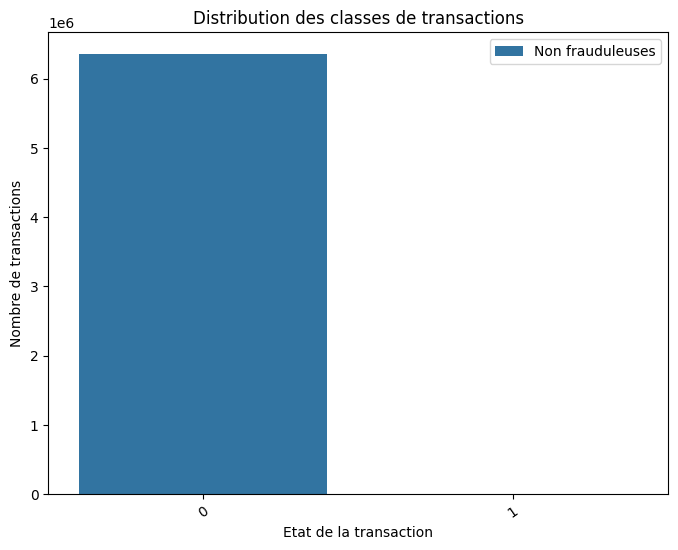

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='isFraud', data=data)
plt.xlabel('Etat de la transaction')
plt.ylabel('Nombre de transactions')
plt.title('Distribution des classes de transactions')
plt.legend(['Non frauduleuses', 'Frauduleuses'])
plt.xticks(rotation=35)
plt.show()

<ipython-input-11-ca181076b6ef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data, palette='colorblind')


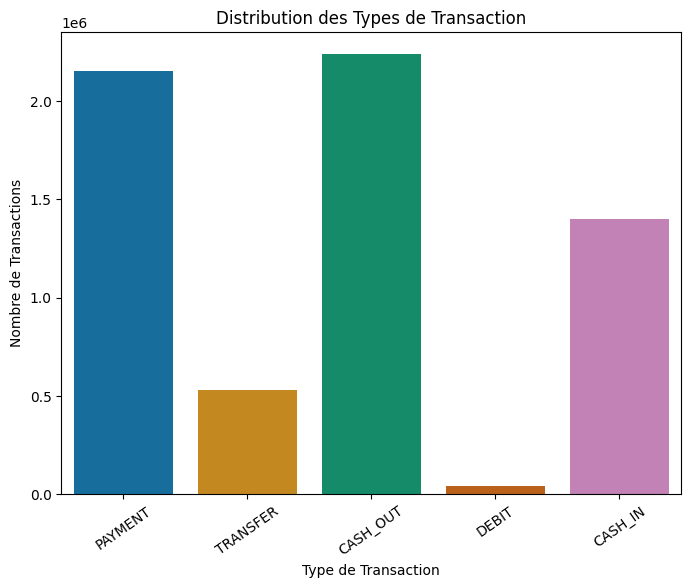

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(x='type', data=data, palette='colorblind')
plt.xlabel('Type de transaction')
plt.ylabel('Nombre de transactions')
plt.xticks(rotation=35)
plt.title('Distribution des Types de Transaction')
plt.xlabel('Type de Transaction')
plt.ylabel('Nombre de Transactions')
plt.show()

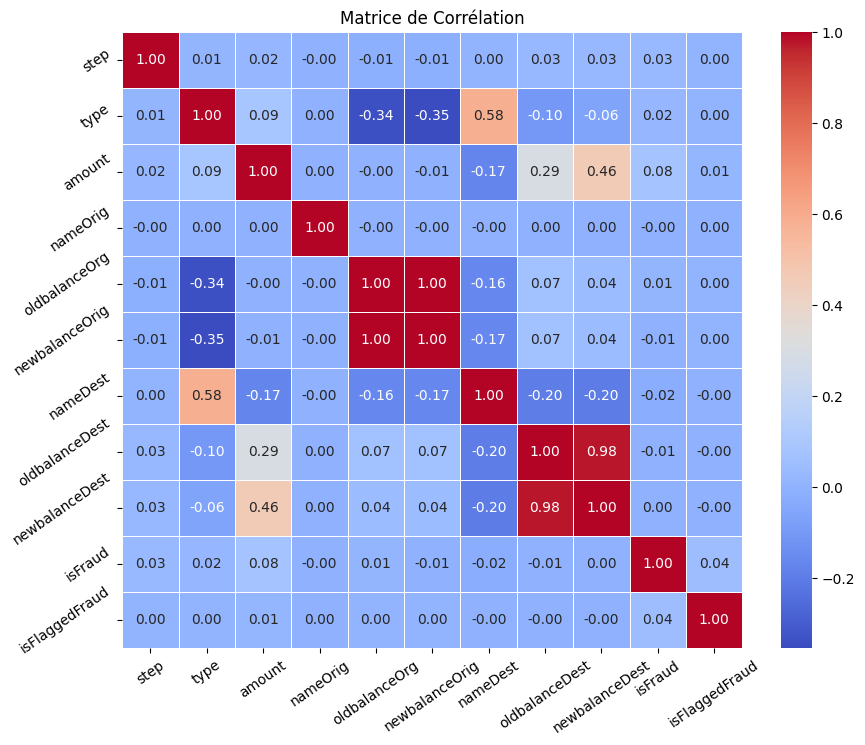

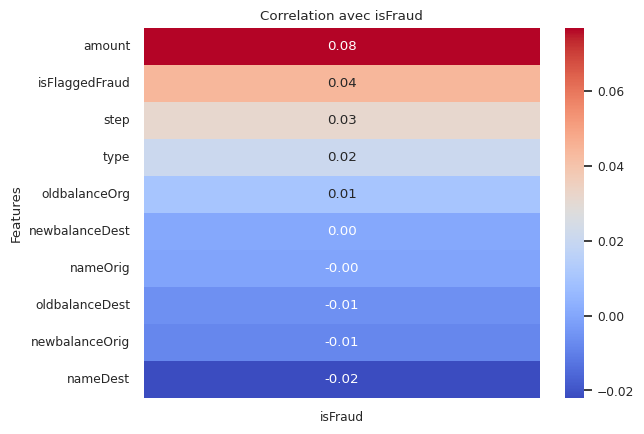

In [12]:
correlation_matrix = data_encoded.corr()

# Affichage de la matrice de corrélation sous forme de carte thermique (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.xticks(rotation=35)
plt.yticks(rotation=35)
plt.show()

# Créer un tableau de des coefficients correlation avec la colonne 'isFraud'
corr = data_encoded.corr()
target_corr = corr['isFraud'].drop('isFraud')

# Trier les coefficients de corrélation dans l'ordre décroissant
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation avec isFraud')
plt.ylabel('Features')
plt.show()

**Normalisation des données**

In [13]:
X = data_encoded.drop(columns=['isFraud', 'newbalanceOrig', 'newbalanceDest'])
y = data_encoded['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

**1-Régression Logistique avec pondération des classes**

In [14]:
lr = LogisticRegression(max_iter=100, class_weight='balanced')
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
print(classification_report(y_test, lr_pred))
auc_roc = roc_auc_score(y_test, lr_pred)
print(f"Logistic_regression AUC-ROC Score: {auc_roc}")

              precision    recall  f1-score   support

           0       1.00      0.85      0.92   1588610
           1       0.01      0.81      0.01      2045

    accuracy                           0.85   1590655
   macro avg       0.50      0.83      0.47   1590655
weighted avg       1.00      0.85      0.92   1590655

Logistic_regression AUC-ROC Score: 0.8302944521828212


La régression logistique peut être adaptée aux classes déséquilibrées en ajustant les poids des classes. on a spécifier ces poids lors de l'entraînement pour accorder plus d'importance à la classe minoritaire(fraude).

**2-Random Forest**

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 75, 100, 150, 200],           # Nombre d'arbres dans la forêt
    'max_depth': [None, 5, 7, 10, 15, 20, 30],           # Profondeur maximale des arbres
    'min_samples_split': [2, 3, 4, 5, 6, 7, 10]            # Nombre minimum d'échantillons requis pour diviser un noeud
}
rf = RandomForestClassifier(n_estimators=75, max_depth=20, min_samples_split=2, class_weight='balanced')
#grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
#grid_search.fit(X_train_scaled, y_train)
#print("Meilleurs paramètres : ", grid_search.best_params_)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
print(classification_report(y_test, rf_pred))
auc_roc = roc_auc_score(y_test, rf_pred)
print(f"Random_Forest AUC-ROC Score: {auc_roc}")

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1588610
           1       0.16      0.88      0.28      2045

    accuracy                           0.99   1590655
   macro avg       0.58      0.94      0.64   1590655
weighted avg       1.00      0.99      1.00   1590655

Random_Forest AUC-ROC Score: 0.9362336334716749


**3-K_Nearest_Neighbors**

In [16]:
Knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=20, p=1)

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],        # Nombre de voisins
    'weights': ['uniform', 'distance'],     # Pondération des voisins
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], # Algorithme de recherche
    'leaf_size': [20, 30, 40],              # Taille des feuilles pour BallTree et KDTree
    'p': [1, 2]                             # Paramètre pour la distance Minkowski (1 = Manhattan, 2 = Euclidienne)
}

#grid_search = GridSearchCV(estimator=Knn_model, param_grid=param_grid, cv=5)
#grid_search.fit(X_train_scaled, y_train)
#print("Meilleurs paramètres trouvés : ", grid_search.best_params_)

Knn_model.fit(X_train_scaled, y_train)
knn_pred = Knn_model.predict(X_test_scaled)
print(classification_report(y_test, knn_pred))
auc_roc = roc_auc_score(y_test, knn_pred)
print(f"KNN AUC-ROC Score: {auc_roc}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.95      0.36      0.52      2045

    accuracy                           1.00   1590655
   macro avg       0.98      0.68      0.76   1590655
weighted avg       1.00      1.00      1.00   1590655

KNN AUC-ROC Score: 0.6779840941048725


<ipython-input-19-012e659f8ddf>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df_accuracies, palette="colorblind")


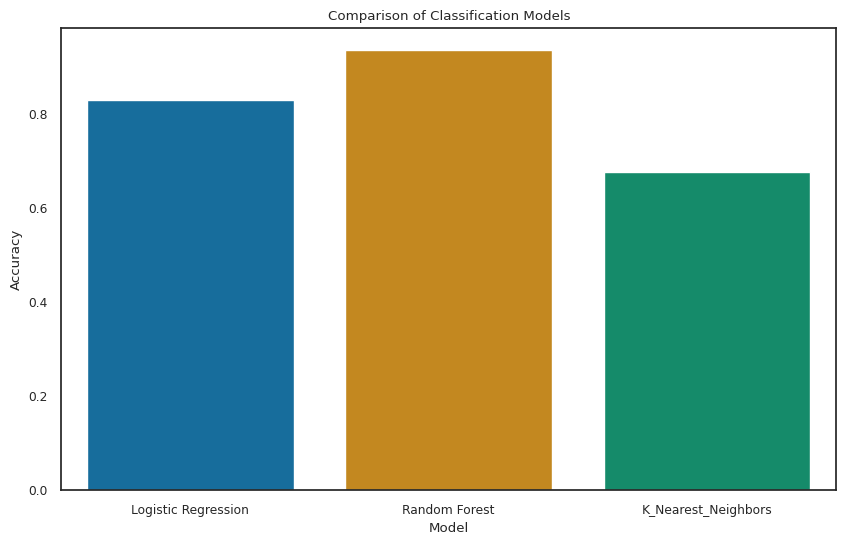

In [19]:
models = ['Logistic Regression', 'Random Forest', 'K_Nearest_Neighbors']
accuracies = [
    roc_auc_score(y_test, lr_pred),
    roc_auc_score(y_test, rf_pred),
    roc_auc_score(y_test, knn_pred)
]
df_accuracies = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_accuracies, palette="colorblind")
plt.title("Comparison of Classification Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()

**CONCLUSION**

La détection de fraude financière est une problématique clé dans le secteur bancaire et financier, et les techniques modernes de machine learning peuvent fournir une solution robuste pour résoudre ce problème. Ce projet met en lumière l'importance de l'utilisation de modèles adaptés aux données déséquilibrées et de la mise en œuvre d'une évaluation rigoureuse pour garantir la performance du modèle.

